Get a base world map

C:\Users\61428\AppData\Local\Temp\ipykernel_204516\3217376347.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
c:\Users\61428\anaconda3\envs\geo_env\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

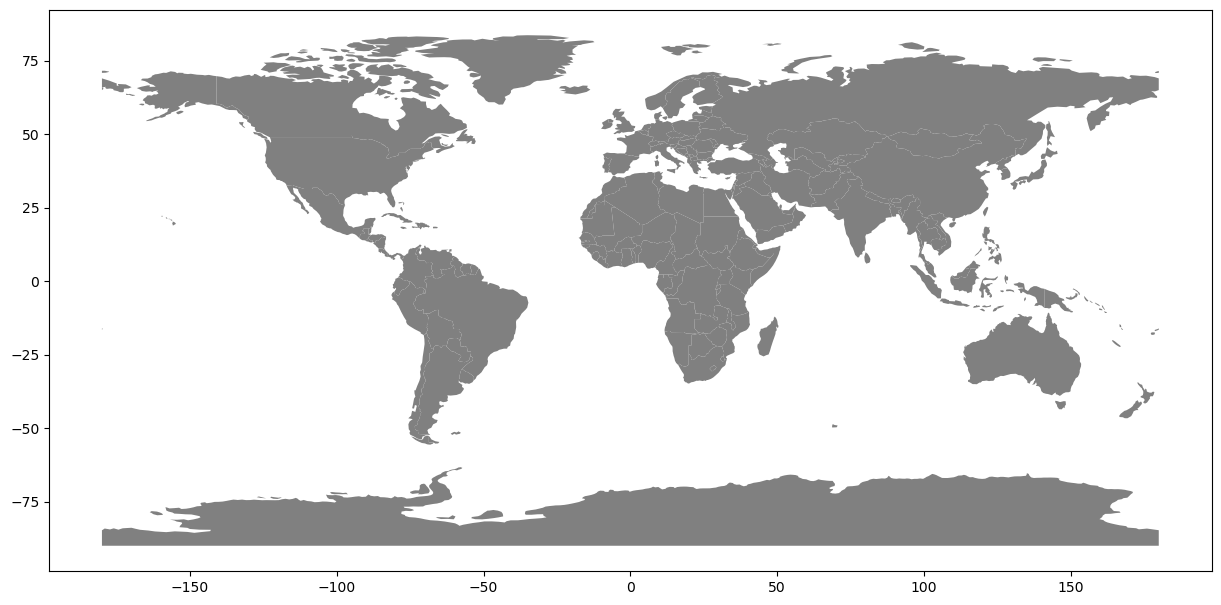

In [1]:
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.crs = {'init': 'epsg:4326'}
world.plot(color='grey', linewidth=0.5, figsize=(15,10))

Read the CSV files of the cities and clean the population column as it would cause problems later on

In [2]:
import numpy as np
cities = gpd.read_file('data/worldcities.csv')
cities['population'] = cities['population'].replace('', 0)
cities['population'] = cities['population'].astype(int)
cities.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id,geometry
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000,1392685764,None
1,Jakarta,Jakarta,-6.175,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000,1360771077,None
2,Delhi,Delhi,28.61,77.23,India,IN,IND,Delhi,admin,32226000,1356872604,None
3,Guangzhou,Guangzhou,23.13,113.26,China,CN,CHN,Guangdong,admin,26940000,1156237133,None
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000,1356226629,None


Create the shapely geometry of each city from the lat, lng columns

In [3]:
from shapely.geometry import Point
cities['geometry'] = cities.apply(lambda row: Point(row.lng, row.lat), axis = 1)
cities = gpd.GeoDataFrame(cities, geometry='geometry')
cities.crs = {'init': 'epsg:4326'}
cities.head()

c:\Users\61428\anaconda3\envs\geo_env\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id,geometry
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37732000,1392685764,POINT (139.69220 35.68970)
1,Jakarta,Jakarta,-6.175,106.8275,Indonesia,ID,IDN,Jakarta,primary,33756000,1360771077,POINT (106.82750 -6.17500)
2,Delhi,Delhi,28.61,77.23,India,IN,IND,Delhi,admin,32226000,1356872604,POINT (77.23000 28.61000)
3,Guangzhou,Guangzhou,23.13,113.26,China,CN,CHN,Guangdong,admin,26940000,1156237133,POINT (113.26000 23.13000)
4,Mumbai,Mumbai,19.0761,72.8775,India,IN,IND,Mahārāshtra,admin,24973000,1356226629,POINT (72.87750 19.07610)


Plot the cities

<Axes: >

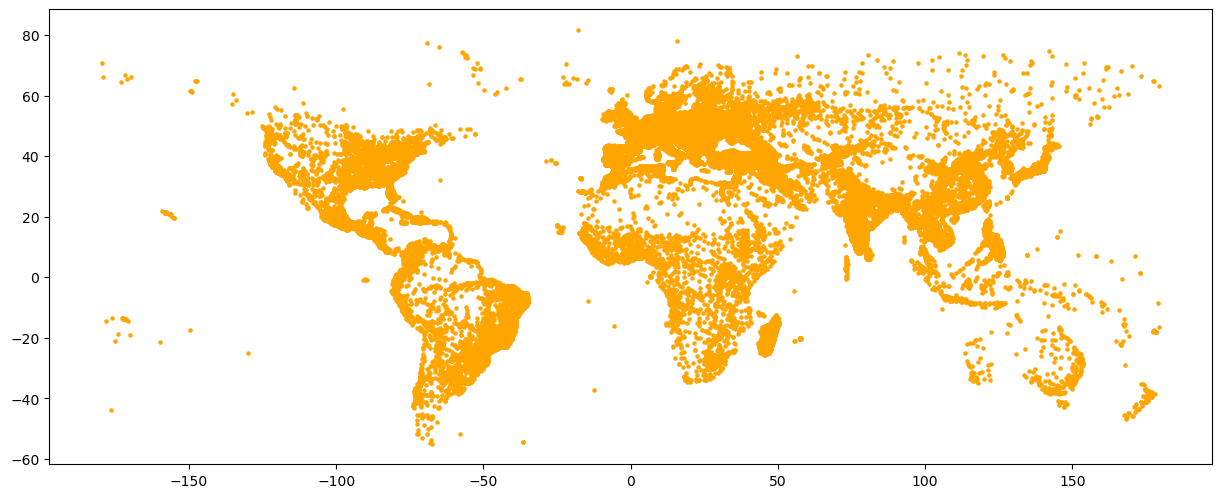

In [4]:
cities.plot(color='orange', markersize=5, figsize=(15,10))

Plot the cities on the base world map

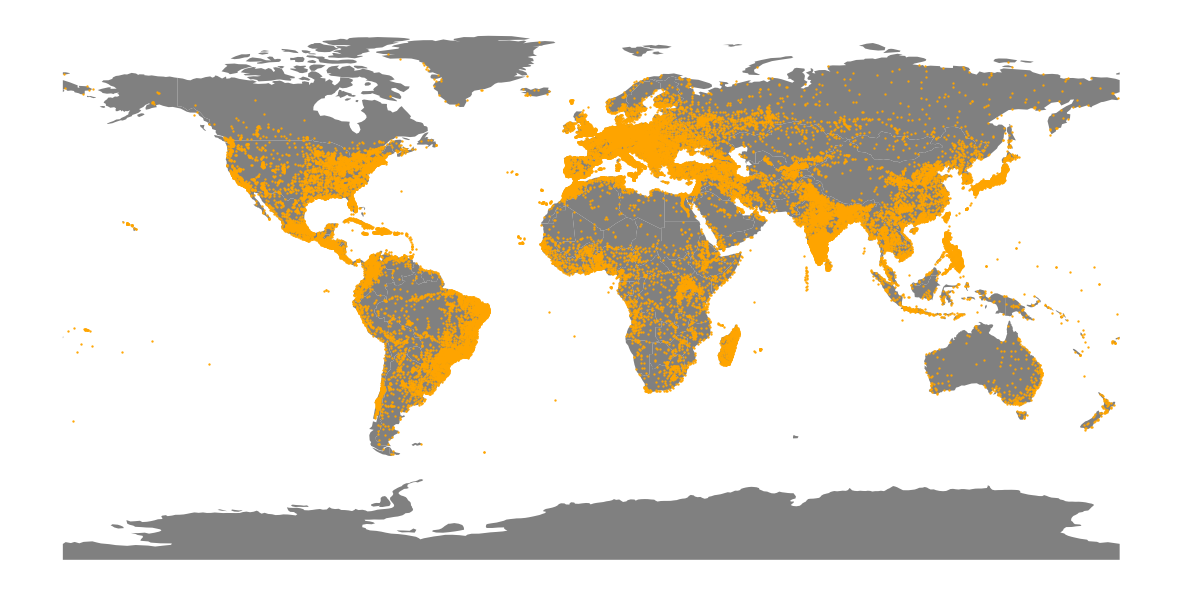

In [5]:
base = world.plot(color='grey', linewidth=0.5, figsize=(15,10))
cities.plot(ax=base, color='orange', markersize = 0.45)
base.set_axis_off()

Read and plot the eclipse shapefile

c:\Users\61428\anaconda3\envs\geo_env\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Axes: >

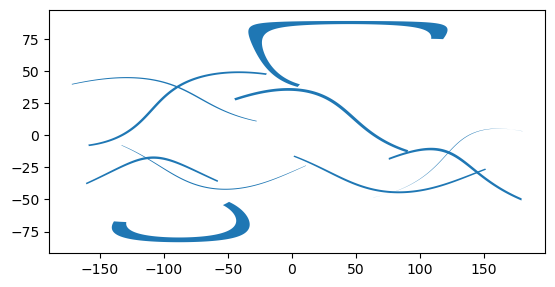

In [6]:
eclipse = gpd.read_file('data/Eclipses.shp')
eclipse.crs = {'init': 'epsg:4326'}
eclipse.head()
eclipse.plot()

Plot the eclipses onto the base world map

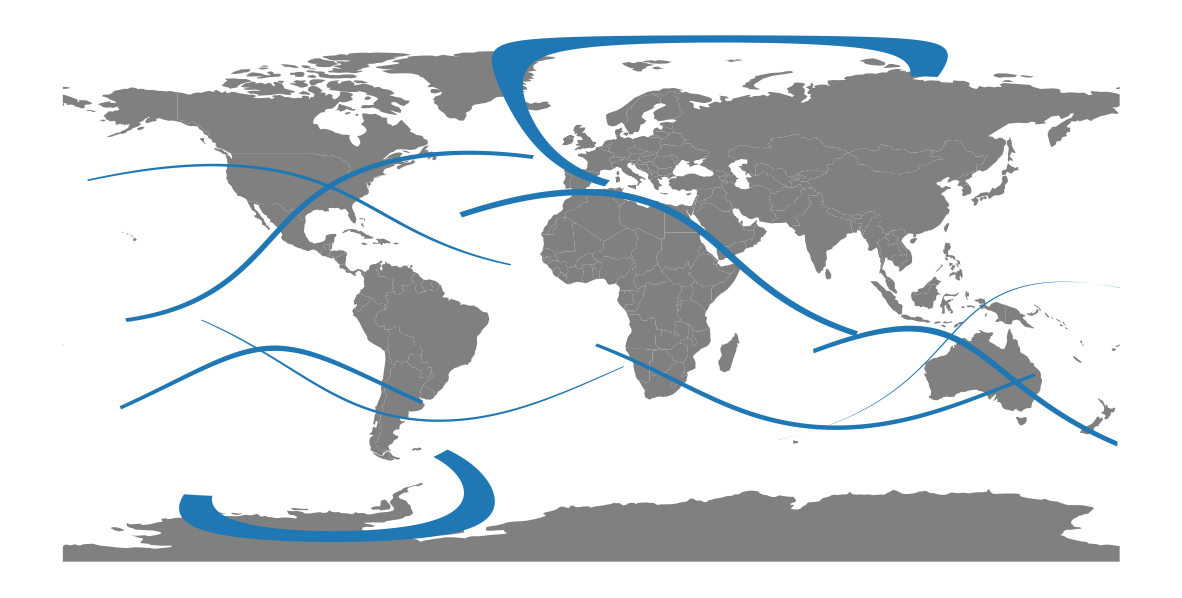

In [7]:
base = world.plot(color='grey', linewidth=0.5, figsize=(15,10))
eclipse.plot(ax=base)
base.set_axis_off()

Colour the eclipses depending on the year they occur in

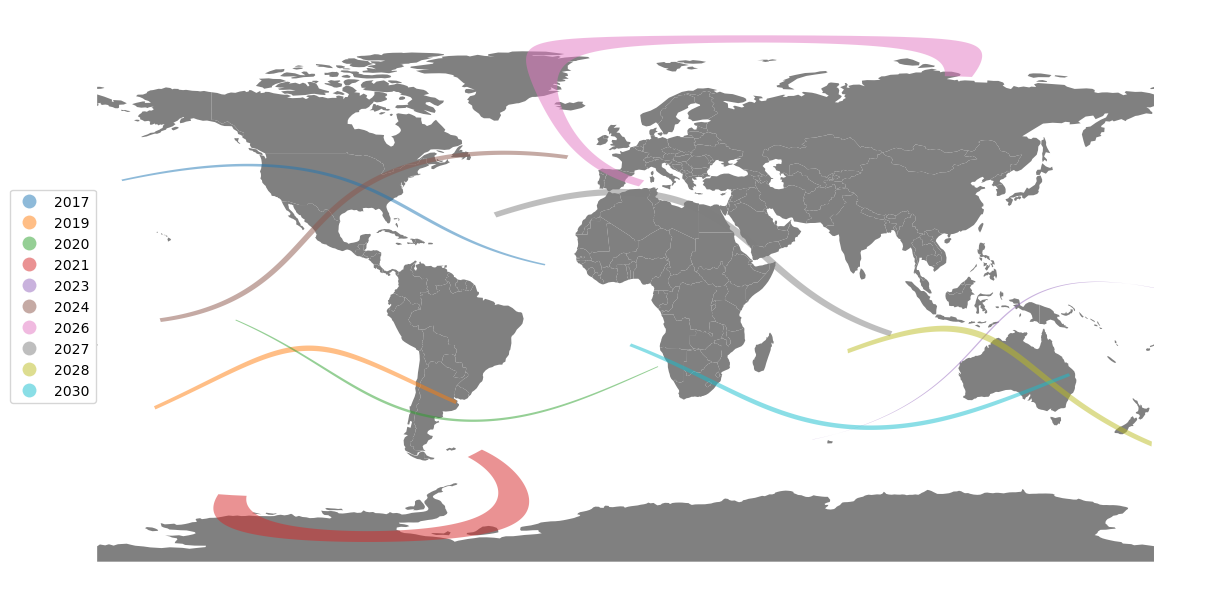

In [8]:
base = world.plot(color='grey', linewidth=0.5, figsize=(15,10))
eclipse.plot(ax=base, cmap='tab10', alpha=0.5, categorical=True, column='Year', legend=True)
base.set_axis_off()
base.get_legend().set_bbox_to_anchor((0.05,0.7))

Plot the eclipses and cities on the base wolrd map

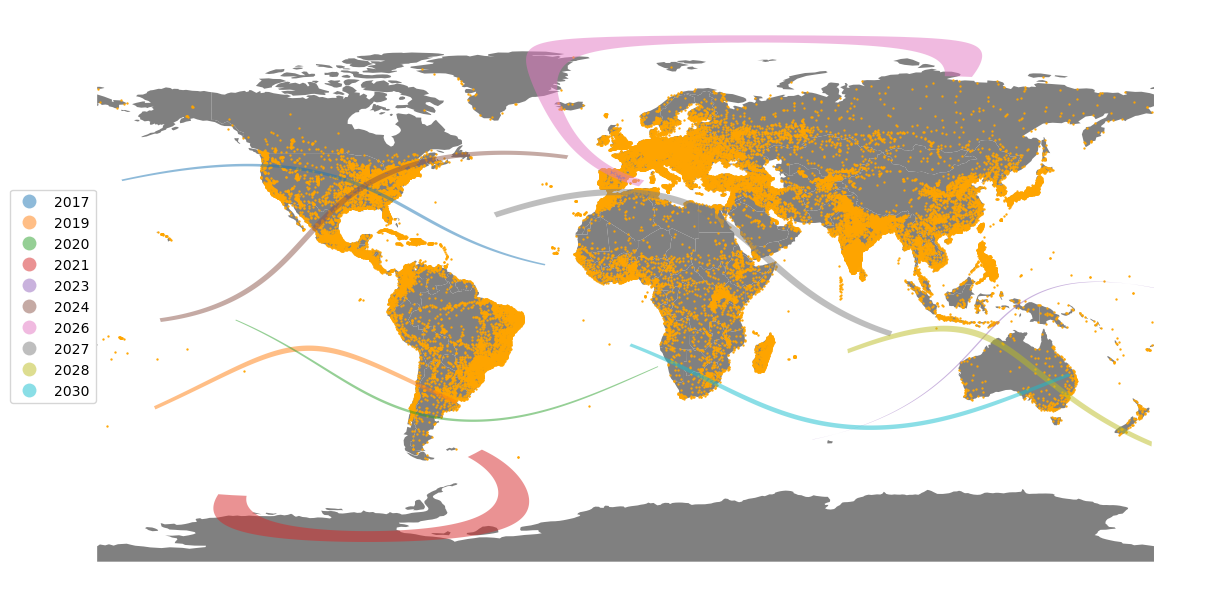

In [9]:
base = world.plot(color='grey', linewidth=0.5, figsize=(15,10))
cities.plot(ax=base, color='orange', markersize = 0.45)
eclipse.plot(ax=base, cmap='tab10', alpha=0.5, categorical=True, column='Year', legend=True)
base.set_axis_off()
base.get_legend().set_bbox_to_anchor((0.05,0.7))

Make a dataset of the cities within the eclipses

In [10]:
allcities = gpd.sjoin(cities, eclipse, how='inner', op='intersects')
allcities.head()

c:\Users\61428\anaconda3\envs\geo_env\Lib\site-packages\IPython\core\interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,...,SymbolID,AltMode,Base,Clamped,Extruded,Snippet,PopupInfo,Shape_Leng,Shape_Area,Year
104,Dallas,Dallas,32.7935,-96.7667,United States,US,USA,Texas,,5668165,...,0,0,0.0,-1,0,NaN,NaN,315.537741,253.727828,2024
220,Montréal,Montreal,45.5089,-73.5617,Canada,CA,CAN,Quebec,,3519595,...,0,0,0.0,-1,0,NaN,NaN,315.537741,253.727828,2024
429,San Antonio,San Antonio,29.4632,-98.5238,United States,US,USA,Texas,,1910785,...,0,0,0.0,-1,0,NaN,NaN,315.537741,253.727828,2024
474,Cleveland,Cleveland,41.4764,-81.6805,United States,US,USA,Ohio,,1683059,...,0,0,0.0,-1,0,NaN,NaN,315.537741,253.727828,2024
482,Indianapolis,Indianapolis,39.7771,-86.1458,United States,US,USA,Indiana,admin,1659305,...,0,0,0.0,-1,0,NaN,NaN,315.537741,253.727828,2024


Plot the eclipses and the cities within the eclipses on the base world map

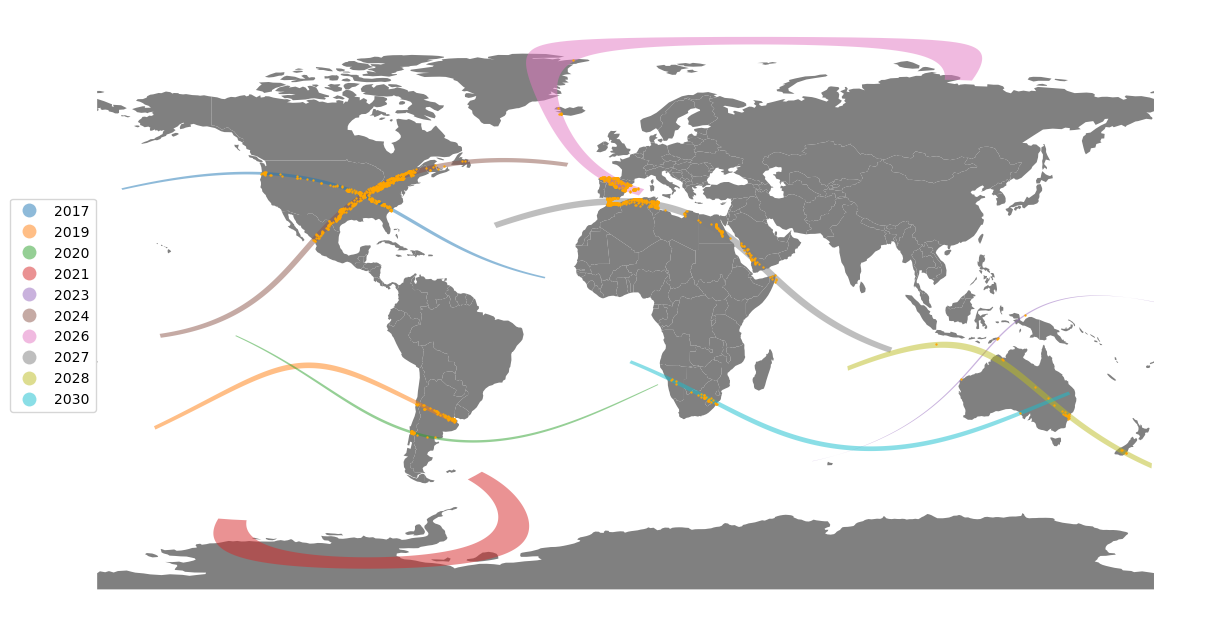

In [11]:
base = world.plot(color='grey', linewidth=0.5, figsize=(15,10))
eclipse.plot(ax=base, cmap='tab10', alpha=0.5, categorical=True, column='Year', legend=True)
allcities.plot(ax=base, color='orange', markersize = 0.45)
base.set_axis_off()
base.get_legend().set_bbox_to_anchor((0.05,0.7))

Make a dataframe of each eclipse cities population and the year the eclipse occurs

In [12]:
import pandas as pd
allcities = pd.DataFrame(allcities[['population', 'Year']])
allcities.head()

,population,Year
104,5668165,2024
220,3519595,2024
429,1910785,2024
474,1683059,2024
482,1659305,2024


Sum the populations where the eclipse occurs in the same year

In [13]:
temp_group = allcities.groupby('Year')['population'].sum()
temp_group

Year
2017     9927235
2019     3612475
2020      671036
2023      112202
2024    44229068
2026    10760526
2027    34969262
2028     5804876
2030     2950027
Name: population, dtype: int32

Merge the populations of the years with the eclipse dataset to get the population for each elcipse

In [14]:
eclips_pop = pd.merge(eclipse, temp_group, left_on='Year', right_index=True)
eclips_pop.head()

,OID_,Name,FolderPath,SymbolID,AltMode,Base,Clamped,Extruded,Snippet,PopupInfo,Shape_Leng,Shape_Area,Year,geometry,population
0,0,Umbra,TSE 2017.08.21/TSE 2017 August 21 Umbral Path,0,0,0.0,-1,0,NaN,NaN,303.633219,130.461081,2017,"POLYGON Z ((-171.57693 39.73810 0.00000, -171....",9927235
1,0,Umbra,TSE 2019.07.02/TSE 2019 July 02 Umbral Path,0,0,0.0,-1,0,NaN,NaN,223.557661,165.607105,2019,"POLYGON Z ((-160.39845 -37.64847 0.00000, -160...",3612475
2,0,Umbra,TSE 2020.12.14/TSE 2020 December 14 Umbral Path,0,0,0.0,-1,0,NaN,NaN,310.979509,99.233931,2020,"POLYGON Z ((-132.81568 -7.77370 0.00000, -132....",671036
4,0,Umbra Limit (East),HSE 2023.04.20/HSE 2023 April 20 Umbral Path,0,0,0.0,-1,0,NaN,NaN,267.246357,31.230251,2023,"POLYGON Z ((180.00000 3.21677 0.00000, 180.000...",112202
5,0,Umbra,TSE 2024.04.08/TSE 2024 April 08 Umbral Path,0,0,0.0,-1,0,NaN,NaN,315.537741,253.727828,2024,"POLYGON Z ((-158.50960 -7.82004 0.00000, -158....",44229068


Sort the eclipse dataset by decending population

In [15]:
eclips_pop.sort_values('population', ascending=False)

,OID_,Name,FolderPath,SymbolID,AltMode,Base,Clamped,Extruded,Snippet,PopupInfo,Shape_Leng,Shape_Area,Year,geometry,population
5,0,Umbra,TSE 2024.04.08/TSE 2024 April 08 Umbral Path,0,0,0.0,-1,0,NaN,NaN,315.537741,253.727828,2024,"POLYGON Z ((-158.50960 -7.82004 0.00000, -158....",44229068
7,0,Umbra,TSE 2027.08.02/TSE 2027 August 02 Umbral Path,0,0,0.0,-1,0,NaN,NaN,303.525460,325.721626,2027,"POLYGON Z ((-44.46106 27.95853 0.00000, -44.92...",34969262
6,0,Umbra,TSE 2026.08.12/TSE 2026 August 12 Umbral Path,0,0,0.0,-1,0,NaN,NaN,431.598625,970.638404,2026,"POLYGON Z ((113.47350 75.08388 0.00000, 108.70...",10760526
0,0,Umbra,TSE 2017.08.21/TSE 2017 August 21 Umbral Path,0,0,0.0,-1,0,NaN,NaN,303.633219,130.461081,2017,"POLYGON Z ((-171.57693 39.73810 0.00000, -171....",9927235
8,0,Umbra,TSE 2028.07.22/TSE 2028 July 22 Umbral Path,0,0,0.0,-1,0,NaN,NaN,952.489452,325.668986,2028,"POLYGON Z ((75.66460 -18.38347 0.00000, 75.524...",5804876
1,0,Umbra,TSE 2019.07.02/TSE 2019 July 02 Umbral Path,0,0,0.0,-1,0,NaN,NaN,223.557661,165.607105,2019,"POLYGON Z ((-160.39845 -37.64847 0.00000, -160...",3612475
9,0,Umbra,TSE 2030.11.25/TSE 2030 November 25 Umbral Path,0,0,0.0,-1,0,NaN,NaN,318.125550,221.452683,2030,"POLYGON Z ((1.61298 -16.21279 0.00000, 1.91056...",2950027
2,0,Umbra,TSE 2020.12.14/TSE 2020 December 14 Umbral Path,0,0,0.0,-1,0,NaN,NaN,310.979509,99.233931,2020,"POLYGON Z ((-132.81568 -7.77370 0.00000, -132....",671036
4,0,Umbra Limit (East),HSE 2023.04.20/HSE 2023 April 20 Umbral Path,0,0,0.0,-1,0,NaN,NaN,267.246357,31.230251,2023,"POLYGON Z ((180.00000 3.21677 0.00000, 180.000...",112202


Plot the eclipses on the base world map and colour them depending on their population

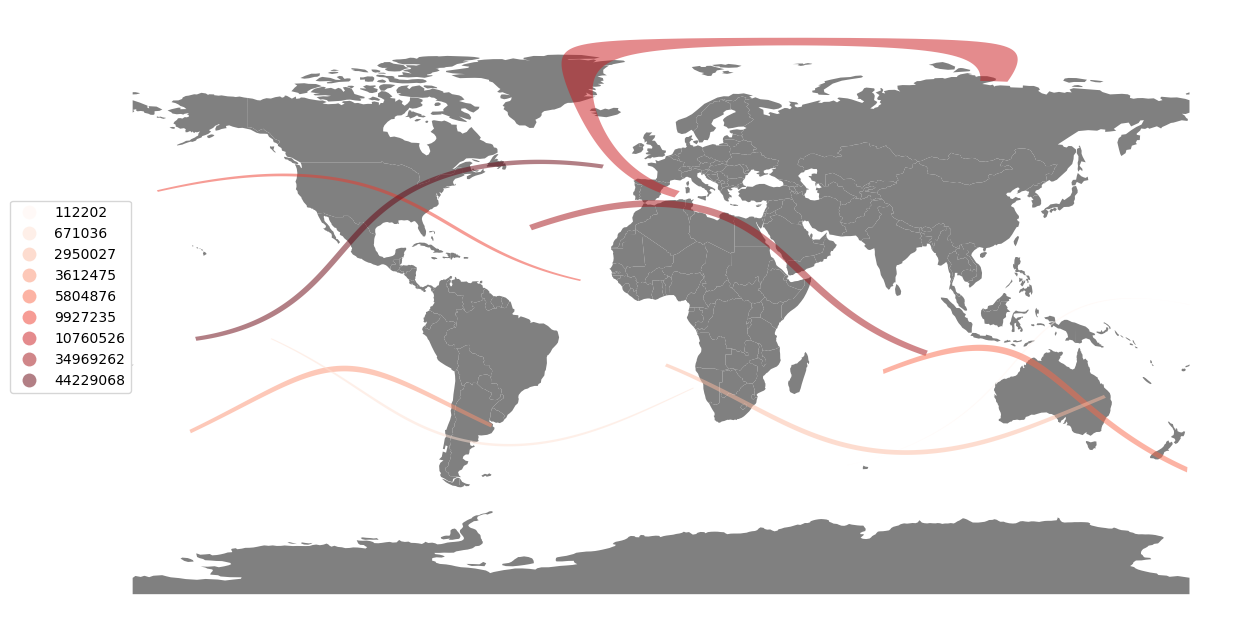

In [16]:
base = world.plot(color='grey', linewidth=0.5, figsize=(15,10))
eclips_pop.plot(ax=base, cmap='Reds', alpha=0.5, categorical=True, column='population', legend=True)
base.set_axis_off()
base.get_legend().set_bbox_to_anchor((0.05,0.7))

Get the data for the most populated eclipse, the one occuring in 2024

In [17]:
largest_elipse = eclipse[(eclipse['Year'] == 2024)]
largest_elipse.head()

,OID_,Name,FolderPath,SymbolID,AltMode,Base,Clamped,Extruded,Snippet,PopupInfo,Shape_Leng,Shape_Area,Year,geometry
5,0,Umbra,TSE 2024.04.08/TSE 2024 April 08 Umbral Path,0,0,0.0,-1,0,NaN,NaN,315.537741,253.727828,2024,"POLYGON Z ((-158.50960 -7.82004 0.00000, -158...."


Plot the all cities and the most populated eclipse on the world map. Zoom into the most populate eclipse area

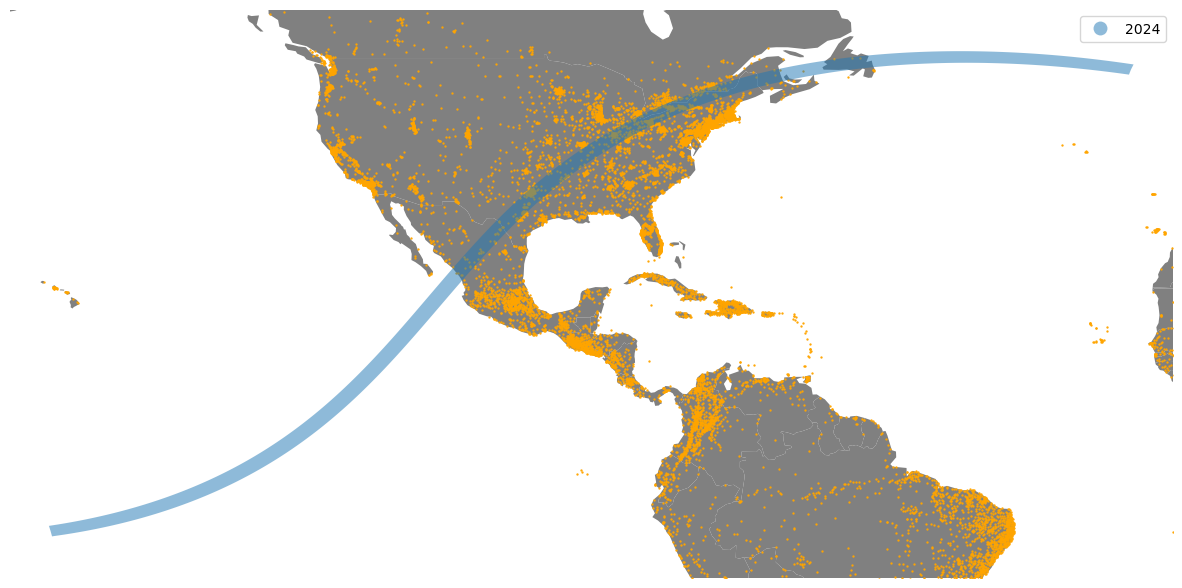

In [18]:
import matplotlib.pyplot as plt
base = world.plot(color='grey', linewidth=0.5, figsize=(15,10))
cities.plot(ax=base, color='orange', markersize = 0.45)
largest_elipse.plot(ax=base, cmap='tab10', alpha=0.5, categorical=True, column='Year', legend=True)
bounds = largest_elipse.geometry.bounds
plt.xlim([bounds.minx.min()-5, bounds.maxx.max() + 5])
plt.ylim([bounds.miny.min() - 5, bounds.maxy.max() + 5])
base.set_axis_off()


Make a dataset of the cities within the most populated eclipse

In [19]:
largest_cities = gpd.sjoin(cities, largest_elipse, how='inner', predicate='intersects')
largest_cities.head()

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,...,SymbolID,AltMode,Base,Clamped,Extruded,Snippet,PopupInfo,Shape_Leng,Shape_Area,Year
104,Dallas,Dallas,32.7935,-96.7667,United States,US,USA,Texas,,5668165,...,0,0,0.0,-1,0,NaN,NaN,315.537741,253.727828,2024
220,Montréal,Montreal,45.5089,-73.5617,Canada,CA,CAN,Quebec,,3519595,...,0,0,0.0,-1,0,NaN,NaN,315.537741,253.727828,2024
429,San Antonio,San Antonio,29.4632,-98.5238,United States,US,USA,Texas,,1910785,...,0,0,0.0,-1,0,NaN,NaN,315.537741,253.727828,2024
474,Cleveland,Cleveland,41.4764,-81.6805,United States,US,USA,Ohio,,1683059,...,0,0,0.0,-1,0,NaN,NaN,315.537741,253.727828,2024
482,Indianapolis,Indianapolis,39.7771,-86.1458,United States,US,USA,Indiana,admin,1659305,...,0,0,0.0,-1,0,NaN,NaN,315.537741,253.727828,2024


Plot the most populated elcipse on the map as well as the cities within it. Scale the citiy markers to their population. Zoom into the largest eclipse area

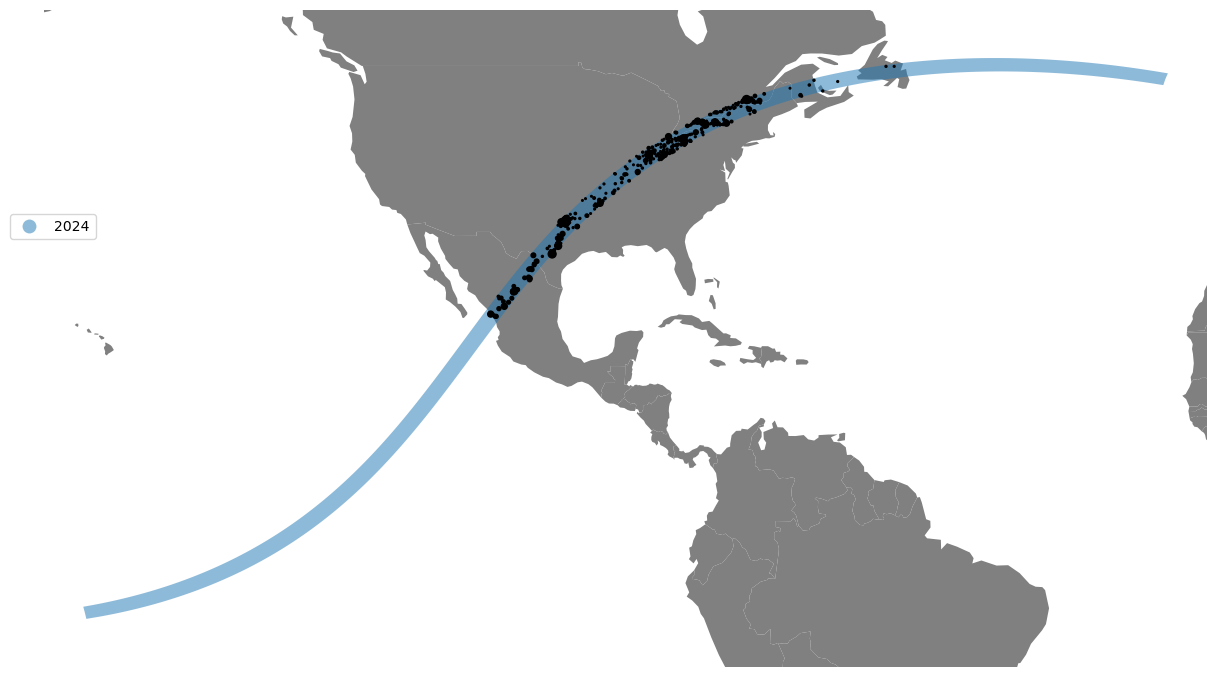

In [20]:

base = world.plot(color='grey', linewidth=0.5, figsize=(15,10))
largest_elipse.plot(ax=base, cmap='tab10', alpha=0.5, categorical=True, column='Year', legend=True)
largest_cities.plot(ax=base, color='black', markersize = cities['population']/1000000)
bounds = largest_elipse.geometry.bounds
plt.xlim([bounds.minx.min()-5, bounds.maxx.max() + 5])
plt.ylim([bounds.miny.min() - 5, bounds.maxy.max() + 5])
base.set_axis_off()
base.get_legend().set_bbox_to_anchor((0.05,0.7))

Print the number and top 5 largest cities in the most populated eclispe

In [21]:
print(f'There are {len(largest_cities)} cities in the elcipse path')
print('These are the top five largest cities:')
print(largest_cities.sort_values('population', ascending=False)['city'].head(5))

There are 586 cities in the elcipse path
These are the top five largest cities:
104          Dallas
220        Montréal
429     San Antonio
474       Cleveland
482    Indianapolis
Name: city, dtype: object


Make a dataset of the top 5 largest cities in the most populated eclipse

In [22]:
top_five = largest_cities.sort_values('population', ascending=False)[:5]

Plot the 5 largest cities and the most populated eclipse. Scale the city's markers by their population. Label the cities with their name and population.

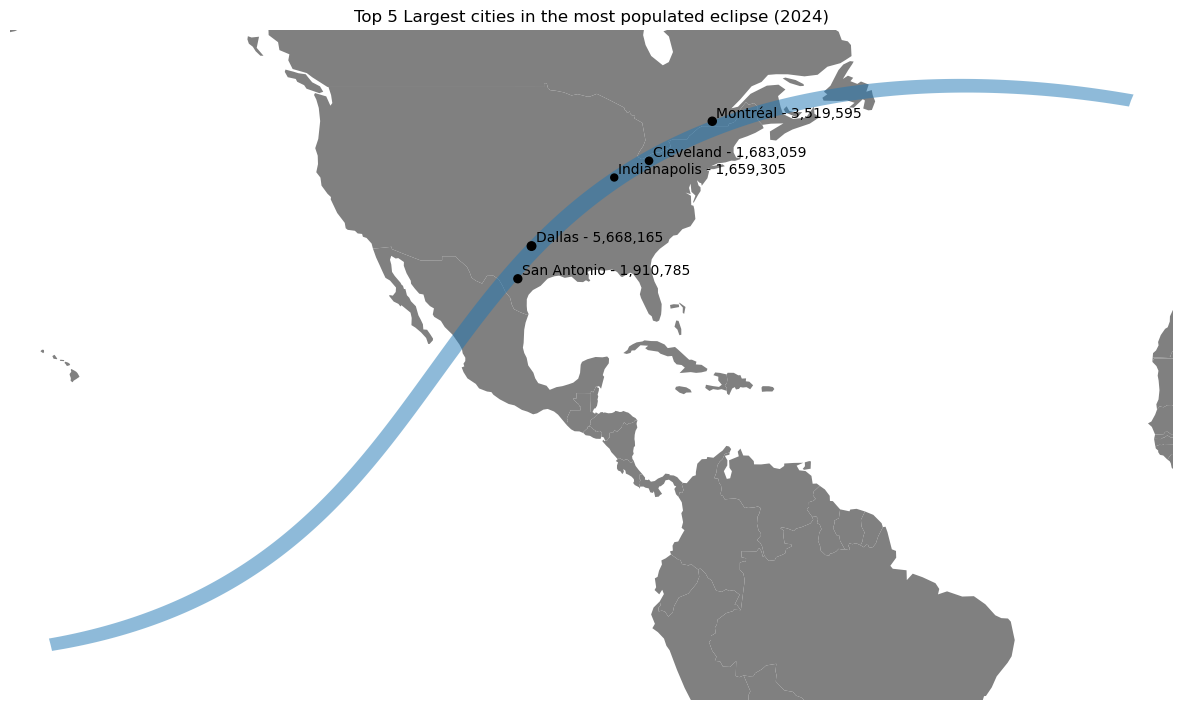

In [23]:
base = world.plot(color='grey', linewidth=0.5, figsize=(15,10))
eclipse = largest_elipse.plot(ax=base, cmap='tab10', alpha=0.5)
top = top_five.plot(ax=base, color='Black', markersize = cities['population']/1000000)
for x, y, name, pop in zip(top_five.geometry.x, top_five.geometry.y, top_five.city, top_five.population):
    label = str(name) + " - " + str("{:,}".format(pop))
    base.annotate(label, xy=(x,y), xytext=(3,3), textcoords='offset points')
bounds = largest_elipse.geometry.bounds
plt.xlim([bounds.minx.min()-5, bounds.maxx.max() + 5])
plt.ylim([bounds.miny.min() - 5, bounds.maxy.max() + 5])
base.set_axis_off()
base.title.set_text("Top 5 Largest cities in the most populated eclipse (2024)")